In [34]:
%pip install numpy pandas matplotlib seaborn torch torchvision Pillow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Set a random seed for reproducibility.
torch.manual_seed(0)
np.random.seed(0)


In [3]:
# Load the CSV files
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')


In [6]:
class TreesDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): Dataframe containing image paths and targets.
            image_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        target = self.dataframe.iloc[idx, 1] if len(self.dataframe.columns) > 1 else None

        if self.transform:
            image = self.transform(image)

        return image, target


In [7]:
# Define your transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])


In [8]:
# Create the dataset
train_dataset = TreesDataset(dataframe=train_df, image_dir='images', transform=transform)
test_dataset = TreesDataset(dataframe=test_df, image_dir='images', transform=transform)

# Create the DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [9]:
from torchvision.models import resnet50

# Load the pre-trained model
model = resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # # Output one continuous value

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Lower lr for fine-tuning

c:\Users\beckt\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\beckt\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, counts in train_loader:  # Assuming counts is a tensor with the number of trees
        counts = counts.float().view(-1, 1)  # Ensure counts is the correct shape and type
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, counts)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

    # Implement a validation phase if you have a validation dataset

torch.save(model.state_dict(), 'model_weights.pth')   


KeyboardInterrupt: 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader

# Assuming you have already defined the dataset classes and transformations
# and the datasets and loaders are initialized (train_loader, possibly valid_loader)

# Initialize the model with the same architecture as before
model = models.resnet50(pretrained=False)  # Make sure not to load pretrained weights here
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Adjust the final layer as per your specific setup

# Load the previously saved weights
model.load_state_dict(torch.load('model_weights.pth'))
model.train()  # Set the model to training mode

# Set device for model computations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # You can adjust the learning rate as needed

# Define the number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, counts in train_loader:
        images, counts = images.to(device), counts.to(device)  # Move data to the appropriate device
        counts = counts.float().view(-1, 1)  # Ensure counts is the correct shape and type
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, counts)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

    # Optionally, you could add a validation phase here to monitor model performance on a validation set


c:\Users\beckt\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


KeyboardInterrupt: 

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader

# Assuming you have already defined the dataset classes and transformations
# and the datasets and loaders are initialized (train_loader, possibly valid_loader)

# Initialize the model with the same architecture as before
model = models.resnet50(pretrained=False)  # Make sure not to load pretrained weights here
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Adjust the final layer as per your specific setup

# Load the previously saved weights
model.load_state_dict(torch.load('model_weights.pth'))
model.train()  # Set the model to training mode

# Set device for model computations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # You can adjust the learning rate as needed

# Define the number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, counts in train_loader:
        images, counts = images.to(device), counts.to(device)  # Move data to the appropriate device
        counts = counts.float().view(-1, 1)  # Ensure counts is the correct shape and type
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, counts)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')

    # Optionally, you could add a validation phase here to monitor model performance on a validation set


KeyboardInterrupt: 

In [1]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, models
from PIL import Image
import os

# Define the transformation used during training
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Define the dataset class
class TreesDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# Set device for model computations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 1)
model.load_state_dict(torch.load('model_weights.pth'))
model.to(device)
model.eval()

# Load test data
test_df = pd.read_csv('Test.csv')
test_dataset = TreesDataset(dataframe=test_df, image_dir='images', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Prepare a DataFrame to store the results
results_df = pd.DataFrame(columns=['ImageId', 'TreeCount'])

# Predict the number of trees for each image in the test dataset
with torch.no_grad():
    for images in test_loader:
        images = images.to(device)
        output = model(images)
        tree_count = output.squeeze().item()  # Convert to a scalar
        image_id = test_df.iloc[len(results_df)]['ImageId']  # Get the corresponding ImageId
        new_row = pd.DataFrame({'ImageId': [image_id], 'TreeCount': [tree_count]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('tree_counts.csv', index=False)

print("Finished predicting tree counts. Results saved to tree_counts.csv.")


c:\Users\beckt\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\beckt\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\beckt\AppData\Local\Temp\ipykernel_12100\4181880907.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=Tr

Finished predicting tree counts. Results saved to tree_counts.csv.


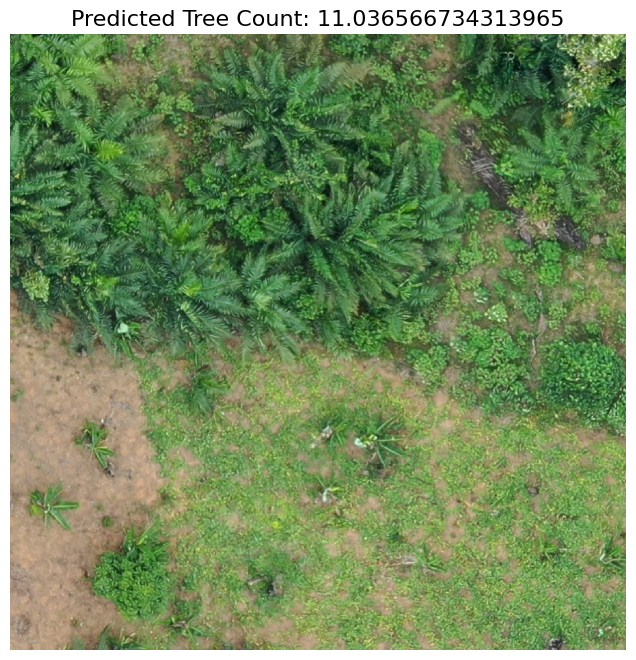

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# Load the predictions and test DataFrame
results_df = pd.read_csv('tree_counts.csv')
test_df = pd.read_csv('Test.csv')
image_dir = 'images'  # Update this to your image directory path

# Function to display image with predicted tree count
def display_image_with_prediction(image_path, predicted_count):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Predicted Tree Count: {predicted_count}", fontsize=16)
    plt.axis('off')  # Turn off axis
    plt.show()

# Select a random image and its prediction
random_index = random.randint(0, len(test_df) - 1)
image_id = test_df.iloc[random_index]['ImageId']
prediction = results_df.loc[results_df['ImageId'] == image_id, 'TreeCount'].values[0]
image_path = os.path.join(image_dir, image_id)

display_image_with_prediction(image_path, prediction)


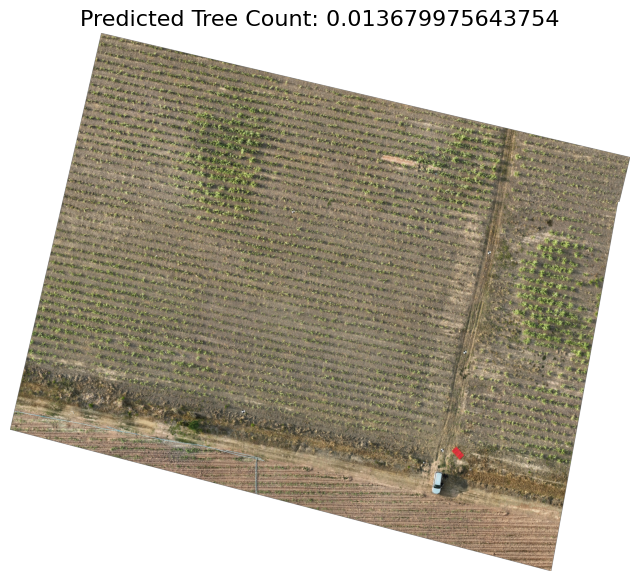

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# Load the predictions
results_df = pd.read_csv('tree_counts.csv')

# Assuming 'mosaic_group1.tif' is the name of your single .tif image
image_path = 'Tree Counting/mosaic_group1.tif'  # Update this to the correct path to your .tif file

# Select a random prediction for demonstration purposes
random_index = random.randint(0, len(results_df) - 1)
predicted_count = results_df.iloc[random_index]['TreeCount']

# Function to display image with predicted tree count
def display_image_with_prediction(image_path, predicted_count):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Predicted Tree Count: {predicted_count}", fontsize=16)
    plt.axis('off')  # Turn off axis
    plt.show()

# Display the image with the prediction
display_image_with_prediction(image_path, predicted_count)
